
image 1/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102118.jpg: 480x640 (no detections), 38.0ms
image 2/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102343.jpg: 640x480 (no detections), 38.0ms
image 3/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102345.jpg: 640x480 (no detections), 35.0ms
image 4/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102459.jpg: 480x640 (no detections), 37.0ms
image 5/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102501.jpg: 480x640 (no detections), 35.0ms
image 6/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102755.jpg: 480x640 (no detections), 36.0ms
image 7/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Grou

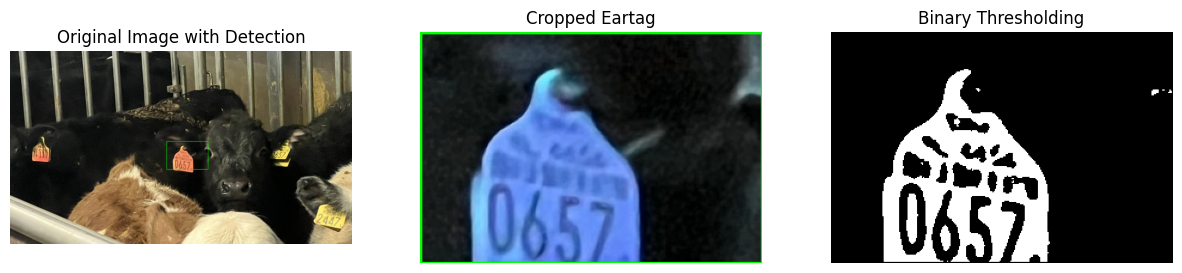

In [5]:

from ultralytics import YOLO
import cv2
import os
import pytesseract
import matplotlib.pyplot as plt


# Load a model
model = YOLO(r"C:/Users/Huijb/OneDrive/Bureaublad/Fontys/Semester 4/Group project/YOLOv8/runs/detect/train3/weights/last.pt")  # build a new model from scratch
#model = YOLO("yolov8n.yaml")  # build a new model from scratch


output_dir = "detections_with_labels"
os.makedirs(output_dir, exist_ok=True)

# Use the model
#model.train(data="config.yaml", epochs=5, batch=4, resume=True, half=True)

test_image_path = r"C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images"  # Replace with the path to a specific image from your dataset

# Run inference on the test image
results = model.predict(source=test_image_path, save=False)

for i, result in enumerate(results):
    if len(result.boxes) == 0:
        continue

    # Load the original image for each detection
    original_image = result.orig_img

    # Loop through each detected bounding box
    for j, box in enumerate(result.boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates

        # Draw bounding box on the original image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green bounding box

        # Crop the detected eartag area
        cropped_eartag = original_image[y1:y2, x1:x2]  # Crop the detected area

        # Step 1: Convert to grayscale
        gray = cv2.cvtColor(cropped_eartag, cv2.COLOR_BGR2GRAY)

        # Step 2: Apply thresholding (binary and adaptive) for OCR clarity
        _, thresh_binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
        thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Display the original image with bounding box and cropped images
        plt.figure(figsize=(15, 7))

        # Original image with bounding box
        plt.subplot(1, 3, 1)
        plt.title("Original Image with Detection")
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        # Cropped eartag image
        plt.subplot(1, 3, 2)
        plt.title("Cropped Eartag")
        plt.imshow(cropped_eartag)
        plt.axis('off')

        # Thresholded images
        plt.subplot(1, 3, 3)
        plt.title("Post-Processed")
        plt.imshow(thresh_binary, cmap="gray")
        plt.axis('off')

        plt.show()